# Task 1

In [44]:
import nltk

performances = ['1.1', '1.2', '1.3.1', '1.3.2', '1.3.3', '1.3.4', '1.3.5', 
                '1.4', '1.5', '1.6.1', '1.6.2', '1.6.3', '1.6.4', '1.6.5',]
accuracies = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
# Fraction of breaking data for training and testing
fraction = 0.8

# To get training and testing sentences
def getTrainTestSents(tagged_sents, fraction):
    size = int(len(tagged_sents) * fraction)
    train_sents = tagged_sents[:size]
    test_sents = tagged_sents[size:]
    
    return (train_sents, tagged_sents)

def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

def transform_to_dataset(tagged_sentences):
    X,y = [],[]
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])

    return X,y

<h3>Corpora</h3>

In [45]:
X1 = nltk.corpus.treebank
X2 = nltk.corpus.brown
X3 = nltk.corpus.indian

X1_tagged_sents = X1.tagged_sents()
X1_tuple_sents = getTrainTestSents(X1_tagged_sents, fraction)
X1_train_sents = X1_tuple_sents[0]
X1_test_sents = X1_tuple_sents[1]

X2_tagged_sents = X2.tagged_sents()
X2_tuple_sents = getTrainTestSents(X2_tagged_sents, fraction)
X2_train_sents = X2_tuple_sents[0]
X2_test_sents = X2_tuple_sents[1]

X3_tagged_sents = X3.tagged_sents('bangla.pos')
X3_tuple_sents = getTrainTestSents(X3_tagged_sents, fraction)
X3_train_sents = X3_tuple_sents[0]
X3_test_sents = X3_tuple_sents[1]

<h3>Model 1</h3>

In [46]:
from nltk import word_tokenize, pos_tag

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

def features(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

def getAccuracy_Model1(tagged_sents, piece):
    size = int(len(tagged_sents) * fraction)
    train_sents = tagged_sents[:size]
    test_sents = tagged_sents[size:]
    
    X_train,y_train = transform_to_dataset(train_sents)
    
    print("Training ", piece, "...")
    clf = Pipeline([
        ('vectorizer', DictVectorizer(sparse=False)),
        ('classifier', DecisionTreeClassifier(criterion='entropy'))
    ])
    clf.fit(X_train[:10000], y_train[:10000])
    print("Training over")
    
    X_test, y_test = transform_to_dataset(test_sents)
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [47]:
accuracy = getAccuracy_Model1(X1_tagged_sents, 'X1')
print('Accuracy for Model1 in X1: ', accuracy)
accuracies[0] = accuracy

Training  X1 ...
Training over
Accuracy for Model1 in X1:  0.89405658965


In [48]:
pieces = 20
print("X2 was split in ",pieces," pieces incase of insufficient memory")
accuracy = 0
l1 = 0
for i in range(1,pieces+1):
    l2 = int(len(X2_tagged_sents) * i * 1.0/pieces)
    accuracy += getAccuracy_Model1(X2_tagged_sents[l1:l2], "X2("+str(l1)+":"+str(l2)+")")
    l1 = l2

accuracy = 1.0 * accuracy/pieces
print('Accuracy for Model1 in X2', accuracy)
accuracies[7] = accuracy

X2 was split in  20  pieces incase of insufficient memory
Training  X2(0:2867) ...
Training over
Training  X2(2867:5734) ...
Training over
Training  X2(5734:8601) ...
Training over
Training  X2(8601:11468) ...
Training over
Training  X2(11468:14335) ...
Training over
Training  X2(14335:17202) ...
Training over
Training  X2(17202:20069) ...
Training over
Training  X2(20069:22936) ...
Training over
Training  X2(22936:25803) ...
Training over
Training  X2(25803:28670) ...
Training over
Training  X2(28670:31537) ...
Training over
Training  X2(31537:34404) ...
Training over
Training  X2(34404:37271) ...
Training over
Training  X2(37271:40138) ...
Training over
Training  X2(40138:43005) ...
Training over
Training  X2(43005:45872) ...
Training over
Training  X2(45872:48739) ...
Training over
Training  X2(48739:51606) ...
Training over
Training  X2(51606:54473) ...
Training over
Training  X2(54473:57340) ...
Training over
Accuracy for Model1 in X2 0.822918418919


<h3>Model 2</h3>

In [49]:
def getAccuracy_Model2(corpus):
    sents = corpus.sents()
    X_pred, y_pred = transform_to_dataset(nltk.pos_tag_sents(sents))
    X, y = transform_to_dataset(corpus.tagged_sents())
    total_count = len(y)
    match_count = 0
    for i in range(total_count):
        if y[i] == y_pred[i]:
            match_count += 1
    
    return match_count * 1.0/total_count  

In [50]:
accuracy = getAccuracy_Model2(X1)
print("Accuracy Model2 in X1:", accuracy)
accuracies[1] = accuracy

Accuracy Model2 in X1: 0.8929834319996821


In [51]:
accuracy = getAccuracy_Model2(X2)
print("Accuracy Model2 in X2:", accuracy)
accuracies[8] = accuracy

Accuracy Model2 in X2: 0.619474643297577


<h3>Model 3</h3>

In [52]:
from nltk import DefaultTagger as df
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt
from nltk import TrigramTagger as tg



patterns = [(r'.*ing$', 'VBG'), 
            (r'.*ed$', 'VBD'), 
            (r'.*es$', 'VBZ'), 
            (r'.*ould$', 'MD'), 
            (r'.*\'s$', 'NN$'),               
            (r'.*s$', 'NNS'), 
            (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), 
            (r'.*', 'NN')]

def getAccuracy_Model3(tagged_sents):
    size = int(len(tagged_sents) * fraction)
    train_sents = tagged_sents[:size]
    test_sents = tagged_sents[size:]
    
    def_model = nltk.DefaultTagger('NN')
    uni_model = nltk.UnigramTagger(train_sents)
    bi_model = nltk.BigramTagger(train_sents)
    tri_model = nltk.TrigramTagger(train_sents)
    regexp_model = nltk.RegexpTagger(patterns)
    
    def_model.evaluate(train_sents)
    uni_model.evaluate(train_sents)
    bi_model.evaluate(train_sents)
    tri_model.evaluate(train_sents)
    regexp_model.evaluate(train_sents)
    
    accuracies = {
        'Default_Tagger': def_model.evaluate(test_sents),
        'Unigram_Tagger': uni_model.evaluate(test_sents),
        'Bigram_Tagger': bi_model.evaluate(test_sents),
        'Trigram_Tagger': tri_model.evaluate(test_sents),
        'Regexp_Tagger': regexp_model.evaluate(test_sents),
    }
    
    return accuracies 

In [53]:
print('Accuracy for Model3 in X1: ')
accuracy = getAccuracy_Model3(X1_tagged_sents)
print(accuracy)
accuracies[2] = accuracy['Default_Tagger']
accuracies[3] = accuracy['Unigram_Tagger']
accuracies[4] = accuracy['Default_Tagger']
accuracies[5] = accuracy['Bigram_Tagger']
accuracies[6] = accuracy['Regexp_Tagger']

Accuracy for Model3 in X1: 
{'Regexp_Tagger': 0.24232746145017217, 'Trigram_Tagger': 0.06701931234093518, 'Unigram_Tagger': 0.8622685762762613, 'Default_Tagger': 0.1447677029791906, 'Bigram_Tagger': 0.11332900843355456}


In [54]:
print('Accuracy for Model3 in X2: ')
accuracy = getAccuracy_Model3(X2_tagged_sents)
print(accuracy)
accuracies[9] = accuracy['Default_Tagger']
accuracies[10] = accuracy['Unigram_Tagger']
accuracies[11] = accuracy['Default_Tagger']
accuracies[12] = accuracy['Bigram_Tagger']
accuracies[13] = accuracy['Regexp_Tagger']

Accuracy for Model3 in X2: 
{'Regexp_Tagger': 0.17594438874995869, 'Trigram_Tagger': 0.19235345311931962, 'Unigram_Tagger': 0.8769788373194672, 'Default_Tagger': 0.10997763652187324, 'Bigram_Tagger': 0.33914820486267944}


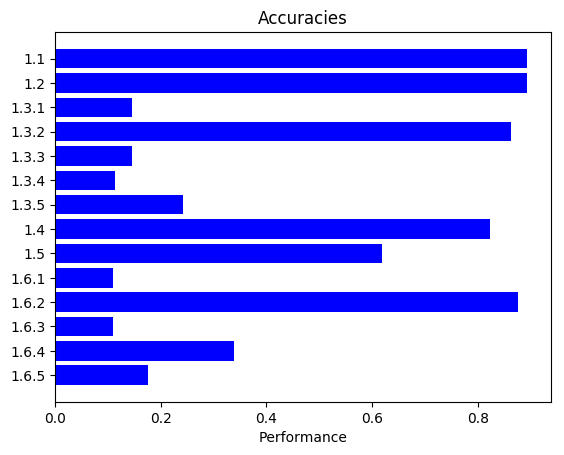

In [55]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(performances, accuracies, align='center',
        color='blue', ecolor='black')
ax.set_yticks(performances)
ax.set_yticklabels(performances)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Accuracies')

plt.show()

# Task 2

<h4>Language: Bengali</h4>

In [56]:
accuracies = [0.0, 0.0]
performances = ['2.1', '2.2']

In [57]:
print("How bengali looks: ", X3.sents()[1])

How bengali looks:  ['বাসস্থান-ঘরগৃহস্থালি', 'তোড়া', 'ভাষায়', 'গ্রামকেও', 'বলে', '`', 'মোদ', "'", '৷']


In [58]:
bengali_numbers = [chr(0x09E6), chr(0x09E7), chr(0x09E8), chr(0x09E9), chr(0x09EA),
                   chr(0x09EB), chr(0x09EC), chr(0x09ED), chr(0x09EE), chr(0x09EF)]
print("Bengali numbers",bengali_numbers)

Bengali numbers ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']


<h3>Model 4</h3>

In [59]:
def transform_to_dataset_bengali(tagged_sentences):
    X,y = [],[]
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features_bengali(untag(tagged), index))
            y.append(tagged[index][1])

    return X,y

def isBengaliNumber(word):
    isNum = True
    for i in list(word):
        if i not in bengali_numbers:
            isNum = False
            break;
    
    return isNum

    
def features_bengali(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'prefix-1': sentence[index][0] if sentence[index] != '' else '',
        'prefix-2': sentence[index][:2] if sentence[index] != '' else '',
        'prefix-3': sentence[index][:3] if sentence[index] != '' else '',
        'suffix-1': sentence[index][-1] if sentence[index] != '' else '',
        'suffix-2': sentence[index][-2:] if sentence[index] != '' else '',
        'suffix-3': sentence[index][-3:] if sentence[index] != '' else '',
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit() or isBengaliNumber(sentence[index])
    }

def getAccuracy_Model4(tagged_sents, piece):
    size = int(len(tagged_sents) * fraction)
    train_sents = tagged_sents[:size]
    test_sents = tagged_sents[size:]
    
    X_train,y_train = transform_to_dataset_bengali(train_sents)
    
    print("Training ", piece, "...")
    clf = Pipeline([
        ('vectorizer', DictVectorizer(sparse=False)),
        ('classifier', DecisionTreeClassifier(criterion='entropy'))
    ])
    clf.fit(X_train[:10000], y_train[:10000])
    print("Training over")
    
    X_test, y_test = transform_to_dataset_bengali(test_sents)
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [60]:
features_bengali(['শৈশব', 'ও', 'কৈশোর', '(', '১৮৬১', '-' ,'১৮৭৮', ')'], 4)

{'has_hyphen': False,
 'is_first': False,
 'is_last': False,
 'is_numeric': True,
 'next_word': '-',
 'prefix-1': '১',
 'prefix-2': '১৮',
 'prefix-3': '১৮৬',
 'prev_word': '(',
 'suffix-1': '১',
 'suffix-2': '৬১',
 'suffix-3': '৮৬১',
 'word': '১৮৬১'}

In [61]:
accuracy = getAccuracy_Model4(X3_tagged_sents, 'X3')
print('Accuracy for Model4 in X3: ', accuracy)
accuracies[0] = accuracy

Training  X3 ...
Training over
Accuracy for Model4 in X3:  0.714648295867


<h3>Model 5</h3>

<h4>Language: Hindi<br/>
POS tagger model: RDRPOSTagger</h4>

Hindi was used because RDRPOSTagger or Treebank did not have dictionary for Bengali.<br/>
Path RDRPOStagger was included as per the location in the local computer.

In [62]:
import sys
sys.path.insert(0, r'/home/saptarshi/UniBonn/MSc/Semester_2/Natural Language Processing/MA-INF-4222-NLP-Lab-master/2017-18_WiSe/RDRPOSTagger-python-3-master/pSCRDRtagger')

import RDRPOSTagger as rpt

def tagged_tuples(tagged_str):
    tagged_tuples = []
    for t in tagged_str.split():
        x, y = t.split('/')
        tagged_tuples.append((x,y))
    
    return tagged_tuples

r = rpt.RDRPOSTagger()
r.constructSCRDRtreeFromRDRfile("../Models/POS/Hindi.RDR")
DICT = rpt.readDictionary("../Models/POS/Hindi.DICT")

t = r.tagRawSentence(DICT, "उनकी माता का नाम आनन्दी देवी था तथा पिता मुंशी अजायबराय लमही में डाकमुंशी थे।")

print("Tagged Sentence in Hindi: ",tagged_tuples(t))

['Node', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'tabStr']
Tagged Sentence in Hindi:  [('उनकी', 'PRP'), ('माता', 'NNP'), ('का', 'PSP'), ('नाम', 'NN'), ('आनन्दी', 'NN'), ('देवी', 'NNP'), ('था', 'VM'), ('तथा', 'CC'), ('पिता', 'NN'), ('मुंशी', 'NNP'), ('अजायबराय', 'NNC'), ('लमही', 'NN'), ('में', 'PSP'), ('डाकमुंशी', 'NN'), ('थे।', 'NN')]


In [63]:
def getAccuracy_Model5(tagged_sents_corpus, tagged_sents_predicted):
    X_pred, y_pred = transform_to_dataset(tagged_sents_predicted)
    X, y = transform_to_dataset(tagged_sents_corpus)
    total_count = len(y)
    match_count = 0
    
    for i in range(total_count):
        if y[i] == y_pred[i]:
            match_count += 1
    
    return match_count * 1.0/total_count

In [64]:
X3_hindi_tagged_sents = X3.tagged_sents('hindi.pos')
X3_hindi_sents = X3.sents('hindi.pos')
X3_hindi_text = [' '.join(i) for i in X3_hindi_sents]
X3_hindi_text = ' '.join(X3_hindi_text)

X3_hindi_tagged_text = r.tagRawSentence(DICT, v)
X3_hindi_predicted_tuples = [tagged_tuples(X3_hindi_tagged_text)]

accuracy = getAccuracy_Model5( X3_hindi_tagged_sents, X3_hindi_predicted_tuples)
print('Accuracy for Model5 in X3(Hindi): ', accuracy)
accuracies[1] = accuracy

Accuracy for Model5 in X3(Hindi):  0.41156462585034015


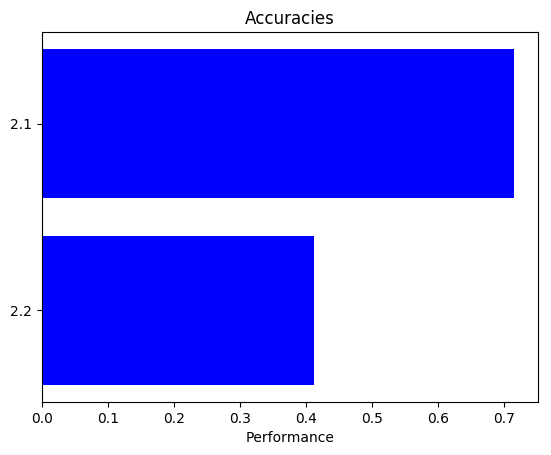

In [65]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(performances, accuracies, align='center',
        color='blue', ecolor='black')
ax.set_yticks(performances)
ax.set_yticklabels(performances)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Accuracies')

plt.show()